In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# What is the output data?

In [36]:
df=pd.read_csv('train.csv')
df.head()
#Output data are qualitative

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How many features?

In [31]:
df.info()
#There are 12 features(columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Does it have nulls?


In [10]:
df.isnull() #There are null values mainly in the Cabin feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Does it have duplicate values?

In [45]:
#There are duplicate values in some features
df['Name'].value_counts()#There are no name duplicates meaning no one has booked 2 tickets

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [46]:
df['PassengerId'].value_counts() #There are no ID duplicates

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [47]:
df['Survived'].value_counts() #There are duplicates in number of people survived (many people survived)

0    549
1    342
Name: Survived, dtype: int64

In [48]:
df['Pclass'].value_counts() #There are Pclass duplicates

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [49]:
df['Age'].value_counts() #There are age duplicates

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [50]:
df['SibSp'].value_counts() #There are SibSp duplicates

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
df['Parch'].value_counts() #There are Parch duplicate

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [53]:
df['Ticket'].value_counts() #There are ticket duplicates(doesn't make much sense)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [54]:
df['Fare'].value_counts() #There are fare duplicates

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [55]:
df['Cabin'].value_counts() #There are cabin duplicates

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [56]:
df['Embarked'].value_counts() #There are embarked duplicates

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Does it have outliers?

<AxesSubplot:>

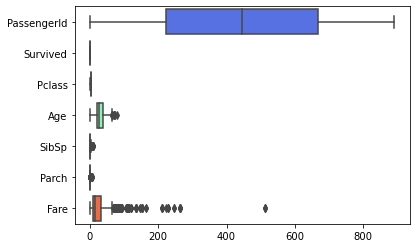

In [21]:
sns.boxplot(data=df,palette='rainbow',orient='h') #Not all features has outliers
                                                  #Fare,Age has outliers

In [19]:
flights=df.pivot_table(values='Age',index='Survived',columns='Sex')
flights
#Females who survived are in their late 20s(28s)
#Males who survived are in their late 20s(27s)
#Females who didn't survive are in their mid 20s(25s)
#Males who didn't survive are in their early 30s(31s)


Sex,female,male
Survived,,
0,25.046875,31.618056
1,28.847716,27.276022


In [29]:
flights=df.pivot_table(values='PassengerId',index='Name',columns='Survived')
flights
#The following table shows the people who survived and the people who didn't

Survived,0,1
Name,,
"Abbing, Mr. Anthony",846.0,NaN
"Abbott, Mr. Rossmore Edward",747.0,NaN
"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,280.0
"Abelson, Mr. Samuel",309.0,NaN
"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,875.0
...,...,...
"de Mulder, Mr. Theodore",NaN,287.0
"de Pelsmaeker, Mr. Alfons",283.0,NaN
"del Carlo, Mr. Sebastiano",362.0,NaN


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

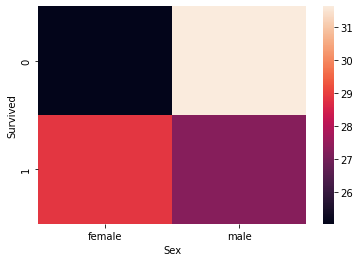

In [43]:
flights=df.pivot_table(values='Age',index='Survived',columns='Sex')
sns.heatmap(flights)
#Males who survived are between 26-28
#Males who didn't survive are between 30-31
#Females who survived are between 28-29
#Females who 